In [1]:
import pandas as pd

df = pd.read_csv('monthly_dataset.csv')

df.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,"480,343.33",14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,"480,343.33",15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,"480,343.33",16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,"470,404.67",16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,"470,404.67",16293.1,9654.67,8730.29


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    object 
 2   Date                   252 non-null    object 
 3   Population (million)   252 non-null    float64
 4   Temperature (celsius)  252 non-null    float64
 5   CPI                    252 non-null    float64
 6   GDP (million bahts)    252 non-null    object 
 7   Peak Load (MW)         252 non-null    float64
 8   Generation (GWh)       252 non-null    float64
 9   Consumption (GWh)      252 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 19.8+ KB


In [3]:
df['GDP (million bahts)'] = df['GDP (million bahts)'].str.replace(',', '').astype(float)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    object 
 2   Date                   252 non-null    object 
 3   Population (million)   252 non-null    float64
 4   Temperature (celsius)  252 non-null    float64
 5   CPI                    252 non-null    float64
 6   GDP (million bahts)    252 non-null    float64
 7   Peak Load (MW)         252 non-null    float64
 8   Generation (GWh)       252 non-null    float64
 9   Consumption (GWh)      252 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.8+ KB


In [5]:
df = df.drop(['Year', 'Month', 'Date', 'Generation (GWh)', 'Consumption (GWh)'], axis=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW)
0,63.24,26.67,71.50,500036.33,18121.4
1,66.39,26.57,98.68,879639.33,27326.0
2,63.62,26.07,89.20,631313.00,22568.2
3,63.00,26.70,81.20,582253.00,20040.3
4,61.97,26.65,73.10,576730.67,17361.9


In [6]:
X = df.drop('Peak Load (MW)', axis=1).values
y = df['Peak Load (MW)'].values

X.shape, y.shape

((252, 4), (252,))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
train_len = 240

X_train = X[:train_len]
X_test = X[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 4), (12, 4), (240,), (12,))

In [10]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='Adam')

history = model.fit(X_train, y_train, epochs=5000, batch_size=48, validation_split=0.2)

Epoch 1/5000
4/4 [==============================] - 1s 59ms/step - loss: 552285120.0000 - val_loss: 599924032.0000
Epoch 2/5000
4/4 [==============================] - 0s 13ms/step - loss: 552274752.0000 - val_loss: 599914688.0000
Epoch 3/5000
4/4 [==============================] - 0s 13ms/step - loss: 552263936.0000 - val_loss: 599904832.0000
Epoch 4/5000
4/4 [==============================] - 0s 13ms/step - loss: 552252480.0000 - val_loss: 599894336.0000
Epoch 5/5000
4/4 [==============================] - 0s 13ms/step - loss: 552240320.0000 - val_loss: 599882560.0000
Epoch 6/5000
4/4 [==============================] - 0s 13ms/step - loss: 552226560.0000 - val_loss: 599869440.0000
Epoch 7/5000
4/4 [==============================] - 0s 15ms/step - loss: 552211392.0000 - val_loss: 599854400.0000
Epoch 8/5000
4/4 [==============================] - 0s 13ms/step - loss: 552194112.0000 - val_loss: 599836928.0000
Epoch 9/5000
4/4 [==============================] - 0s 14ms/step - loss: 5521737

In [11]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 95ms/step - loss: 226763.0156
Test loss: 226763.015625


1/1 [==============================] - 0s 84ms/step


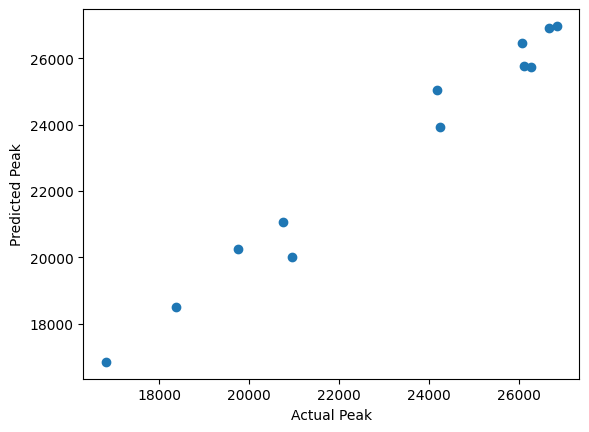

In [12]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

MSE  = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, y_pred)
MAPE = mape(y_test, y_pred)

MSE, RMSE, MAE, MAPE

(226762.7439239401, 476.1961191819397, 394.28335937500015, 0.17529687995804222)